In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sb; sb.set(style="whitegrid", font_scale=1.25, color_codes=True) 

%matplotlib inline

# Columns

age: age of primary beneficiary

sex: insurance contractor gender: female, male

bmi: bmi is defined as the body mass divided by the square of the body height, and is universally expressed in units of kg/m², resulting from mass in kilograms and height in metres

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

# Adult Body Mass Index (BMI)
If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to <25, it falls within the normal.
If your BMI is 25.0 to <30, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obese range.

In [2]:
med_df = pd.read_csv('insurance.csv')

In [3]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
med_df.max()

age                64
sex              male
bmi             53.13
children            5
smoker            yes
region      southwest
charges       63770.4
dtype: object

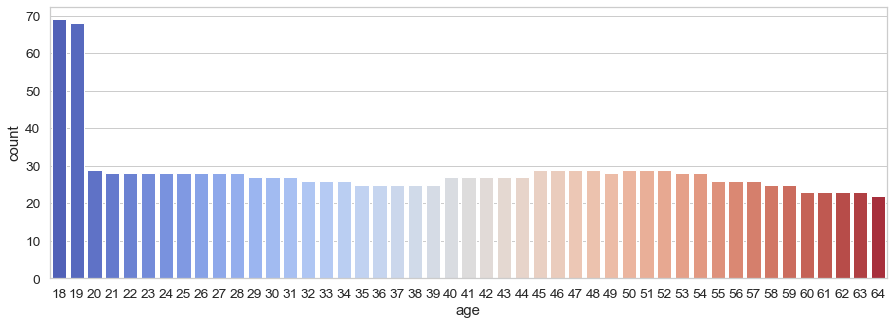

In [5]:
plt.figure(figsize=(15,5))
sb.countplot(x='age', data=med_df, palette='coolwarm' )

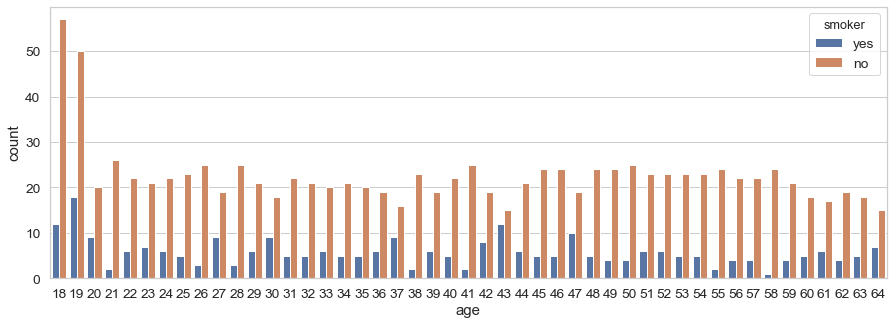

In [6]:
plt.figure(figsize=(15,5))
sb.countplot(x='age', hue='smoker', data=med_df)

<Figure size 1080x360 with 0 Axes>

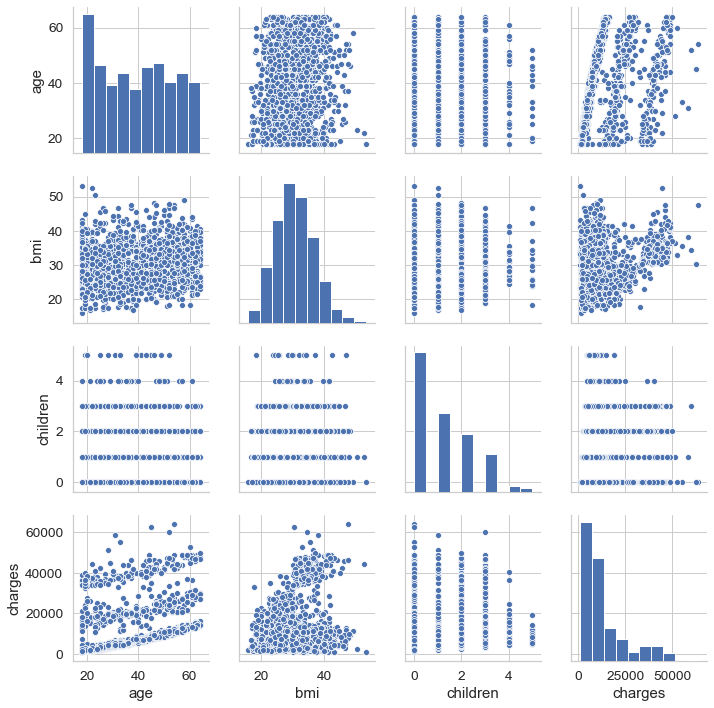

In [7]:
plt.figure(figsize=(15,5))
sb.pairplot(med_df)

In [8]:
bins = [17,35,55,1000]
slots = ['Young adult','Senior Adult','Elder']


med_df['Age_range']=pd.cut(med_df['age'],bins=bins,labels=slots)

In [9]:
bins2 = [0,18.5,25,30,100]
slots2 = ['Under weight','Normal','Overweight','Obese']


med_df['BMI']=pd.cut(med_df['bmi'],bins=bins2,labels=slots2)

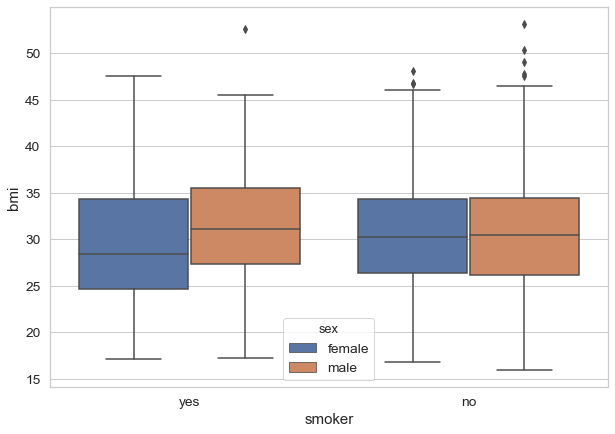

In [88]:
plt.figure(figsize=(10,7))
sb.boxplot(x='smoker', y='bmi', hue='sex', data=med_df)

In [10]:
med_df.head(20)

age     sex     bmi  children smoker     region      charges  \
0    19  female  27.900         0    yes  southwest  16884.92400   
1    18    male  33.770         1     no  southeast   1725.55230   
2    28    male  33.000         3     no  southeast   4449.46200   
3    33    male  22.705         0     no  northwest  21984.47061   
4    32    male  28.880         0     no  northwest   3866.85520   
5    31  female  25.740         0     no  southeast   3756.62160   
6    46  female  33.440         1     no  southeast   8240.58960   
7    37  female  27.740         3     no  northwest   7281.50560   
8    37    male  29.830         2     no  northeast   6406.41070   
9    60  female  25.840         0     no  northwest  28923.13692   
10   25    male  26.220         0     no  northeast   2721.32080   
11   62  female  26.290         0    yes  southeast  27808.72510   
12   23    male  34.400         0     no  southwest   1826.84300   
13   56  female  39.820         0     no  southeast  11090.71780   
14   27    male  42.130         0    yes  southeast  39611.75770   
15   19    male  24.600         1     no  southwest   1837.23700   
16   52  female  30.780         1     no  northeast  10797.33620   
17   23    male  23.845         0     no  northeast   2395.17155   
18   56    male  40.300         0     no  southwest  10602.38500   
19   30    male  35.300         0    yes  southwest  36837.46700   

       Age_range         BMI  
0    Young adult  Overweight  
1    Young adult       Obese  
2    Young adult       Obese  
3    Young adult      Normal  
4    Young adult  Overweight  
5    Young adult  Overweight  
6   Senior Adult       Obese  
7   Senior Adult  Overweight  
8   Senior Adult  Overweight  
9          Elder  Overweight  
10   Young adult  Overweight  
11         Elder  Overweight  
12   Young adult       Obese  
13         Elder       Obese  
14   Young adult       Obese  
15   Young adult      Normal  
16  Senior Adult       Obese  
17   Young adult      Normal  
18         Elder       Obese  
19   Young adult       Obese

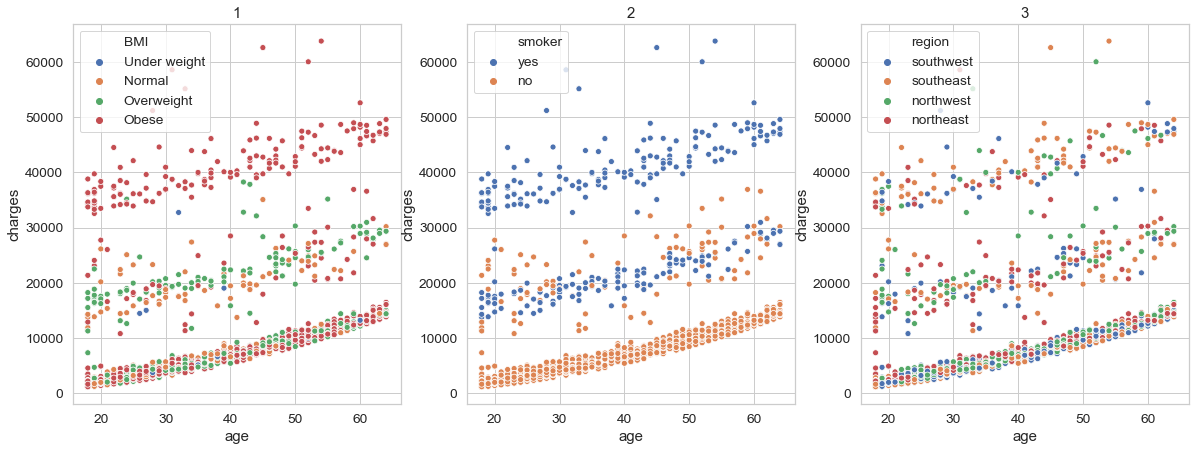

In [89]:
fig, axes= plt.subplots(1, 3, squeeze=False, figsize = (20,7))

ax1, ax2, ax3 = axes.flatten()

ax1.set_title('1')
sb.scatterplot(x='age', y='charges', hue='BMI', data=med_df, ax=ax1)

ax2.set_title('2')
sb.scatterplot(x='age', y='charges', hue='smoker', data=med_df, ax=ax2)

ax3.set_title('3')
sb.scatterplot(x='age', y='charges', hue='region', data=med_df, ax=ax3)

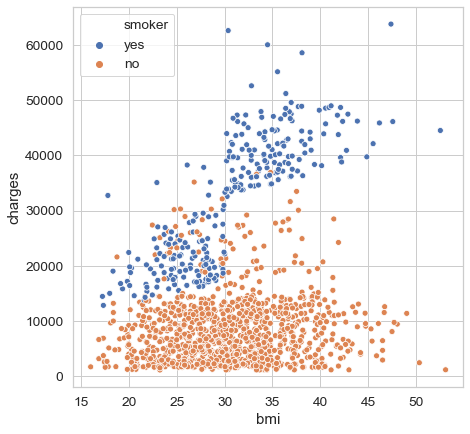

In [91]:
pvt.figure(figsize=(7,7))
sb.scatterplot(x='bmi', y='charges', hue='smoker', data=med_df)

# Studying separately the charges for smokers

In [38]:
#onlysmokers = [med_df['charges'][v] for v in med_df['smoker'][v] == 'yes' or 0]

# onlysmokers = []
# for v in range(len(med_df)):
#     if med_df['smoker'][v] == 'yes':
#         onlysmokers.append(med_df['charges'][v])
#     #else:
#         #onlysmokers.append(0)

# smoke_charg = pd.DataFrame(onlysmokers)
# smoke_charg.rename(columns = {0:'smoker_charges'},inplace=True)

# Separating DF's for Smokers and Not Smokers

In [78]:
onlysmokers = med_df[med_df['smoker'] == 'yes'].copy()
notsmokers = med_df[med_df['smoker'] == 'no'].copy()

onlysmokers.reset_index(inplace=True)
onlysmokers.drop('index',axis=1, inplace=True)

notsmokers.reset_index(inplace=True)
notsmokers.drop('index',axis=1, inplace=True)

In [79]:
notsmokers.head()

age     sex     bmi  children smoker     region      charges    Age_range  \
0   18    male  33.770         1     no  southeast   1725.55230  Young adult   
1   28    male  33.000         3     no  southeast   4449.46200  Young adult   
2   33    male  22.705         0     no  northwest  21984.47061  Young adult   
3   32    male  28.880         0     no  northwest   3866.85520  Young adult   
4   31  female  25.740         0     no  southeast   3756.62160  Young adult   

          BMI  
0       Obese  
1       Obese  
2      Normal  
3  Overweight  
4  Overweight

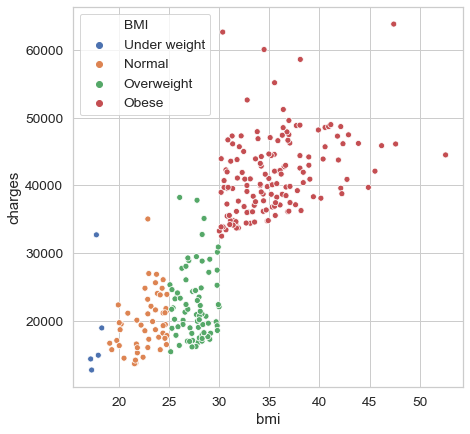

In [82]:
plt.figure(figsize=(7,7))
sb.scatterplot(x='bmi', y='charges', hue='BMI', data=onlysmokers)

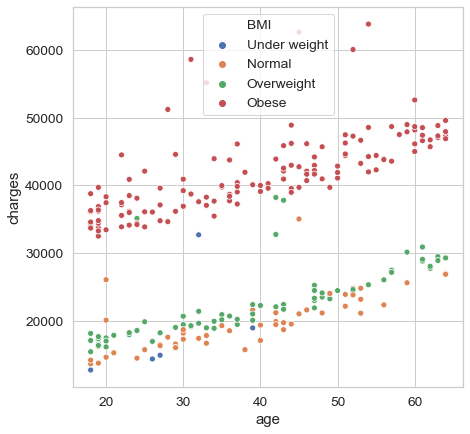

In [92]:
plt.figure(figsize=(7,7))
sb.scatterplot(x='age', y='charges', hue='BMI', data=onlysmokers)

Seems lilke if you're a smoker person, the costs should almost duplicate for your medical insurance. 

# Puttin' everyting on Numeric data

<b> Useless </b>

# Puttin' everything in dummies

In [14]:
medumm_df = med_df

In [15]:
Sex = pd.get_dummies(medumm_df['sex'], drop_first=True)
Smoker = pd.get_dummies(medumm_df['smoker'],drop_first=True) 
#Bodymass = pd.get_dummies(medumm_df['BMI'])
Regions = pd.get_dummies(medumm_df['region'])

In [16]:
medumm_df = pd.concat([Sex, Smoker, medumm_df, Regions], axis=1)

In [17]:
medumm_df = medumm_df.drop(['sex','smoker', 'BMI', 'region', 'Age_range'],axis=1)

In [18]:
medumm_df.rename(columns = {'yes':'Smoker'},inplace=True)

In [19]:
medumm_df.head()

male  Smoker  age     bmi  children      charges  northeast  northwest  \
0     0       1   19  27.900         0  16884.92400          0          0   
1     1       0   18  33.770         1   1725.55230          0          0   
2     1       0   28  33.000         3   4449.46200          0          0   
3     1       0   33  22.705         0  21984.47061          0          1   
4     1       0   32  28.880         0   3866.85520          0          1   

   southeast  southwest  
0          0          1  
1          1          0  
2          1          0  
3          0          0  
4          0          0

# Splitting Data for the Whole dataset

In [20]:
X = medumm_df.drop('charges', axis=1)

y = medumm_df['charges']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
print(lm.intercept_)

-11567.143606865908


In [27]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
male        -282.796347
Smoker     24059.390477
age          251.681865
bmi          322.389107
children     344.964255
northeast    527.905188
northwest    223.815091
southeast   -411.436909
southwest   -340.283370

## Predictions

In [28]:
predict = lm.predict(X_test)

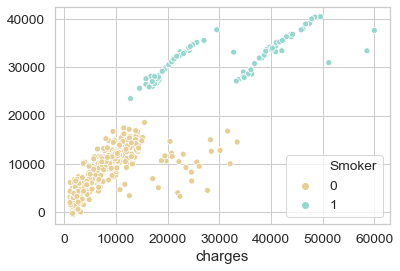

In [29]:
sb.scatterplot(x=y_test, y=predict, hue = X_test['Smoker'], palette='BrBG')

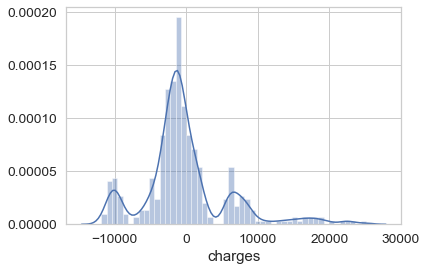

In [30]:
#Residual Distribution
sb.distplot(y_test-predict, bins = 50)

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 4139.932064766017
MSE: 36761456.35201327
RMSE: 6063.122656850451


# Splitting data for specific smoking conditions